#Uni ID: 2414250
#Name: Prakash Bhatt

#Classification Model

##1. Data Loading and Initial Exploration
The dataset is loaded into a Pandas DataFrame, and an initial exploration is performed. This includes displaying the first few rows, checking the data types of each column, and summarizing the dataset's structure. This step helps in understanding the available features and identifying any potential issues such as missing values or incorrect data types.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFE, SelectKBest, f_classif
from sklearn.metrics import roc_curve, auc

##2. Dataset Selection and Initial Analysis

In [4]:
df = pd.read_csv('/content/drive/MyDrive/brain_stroke.csv')
print("Dataset Overview:")
print(df.info())
print(df.head())
# Add dataset description
print("This dataset is related to brain strokes. It contains medical history data of patients and predicts stroke risk.")
print("It aligns with UNSDG Goal 3: Good Health and Well-being by improving stroke prediction.")


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB
None
   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0 

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [10]:
# Drop rows with missing values
df = df.dropna()

# Verify if missing values are removed
print("\nMissing Values after cleaning:\n", df.isnull().sum())


Missing Values after cleaning:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


##5. Outlier Detection and Treatment
Explanation:
Outliers in numerical features are identified using statistical methods such as the Interquartile Range (IQR) method and boxplots. Extreme values are analyzed to determine if they should be removed or adjusted to improve model performance.

In [12]:
# Define numerical features again
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Outlier detection using IQR
Q1 = df[numerical_features].quantile(0.25)  # First quartile (25th percentile)
Q3 = df[numerical_features].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound))

# Count number of outliers per column
print("\nNumber of Outliers in Each Numerical Feature:\n", outliers.sum())

# Remove outliers by filtering within bounds
df_cleaned = df[~outliers.any(axis=1)]  # Removes rows with any outlier

# Print dataset shape before and after outlier removal
print("\nDataset shape before outlier removal:", df.shape)
print("Dataset shape after outlier removal:", df_cleaned.shape)



Number of Outliers in Each Numerical Feature:
 age                    0
hypertension         479
heart_disease        275
avg_glucose_level    602
bmi                   43
stroke               248
dtype: int64

Dataset shape before outlier removal: (4981, 11)
Dataset shape after outlier removal: (3770, 11)


##set of Histograms

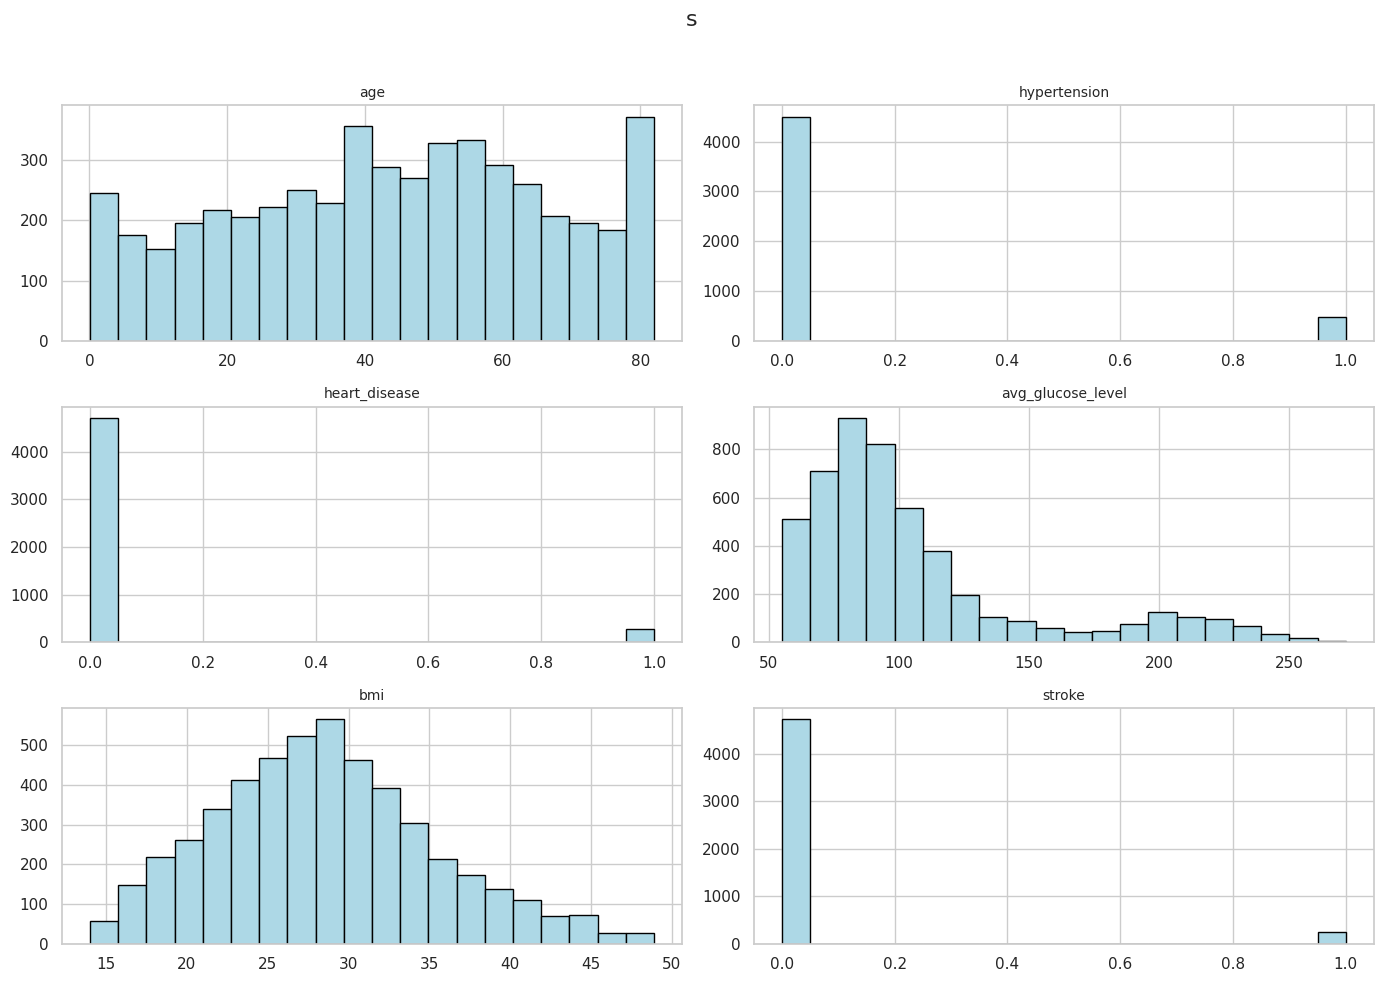

In [ ]:
sns.set(style="whitegrid")

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features].hist(bins=20, figsize=(14, 10), color='lightblue', edgecolor='black')

plt.suptitle('s', fontsize=16)
for ax in plt.gcf().axes:
    ax.set_title(ax.get_title(), fontsize=10)
    ax.set_xlabel(ax.get_xlabel(), fontsize=8)
    ax.set_ylabel(ax.get_ylabel(), fontsize=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##Box plot

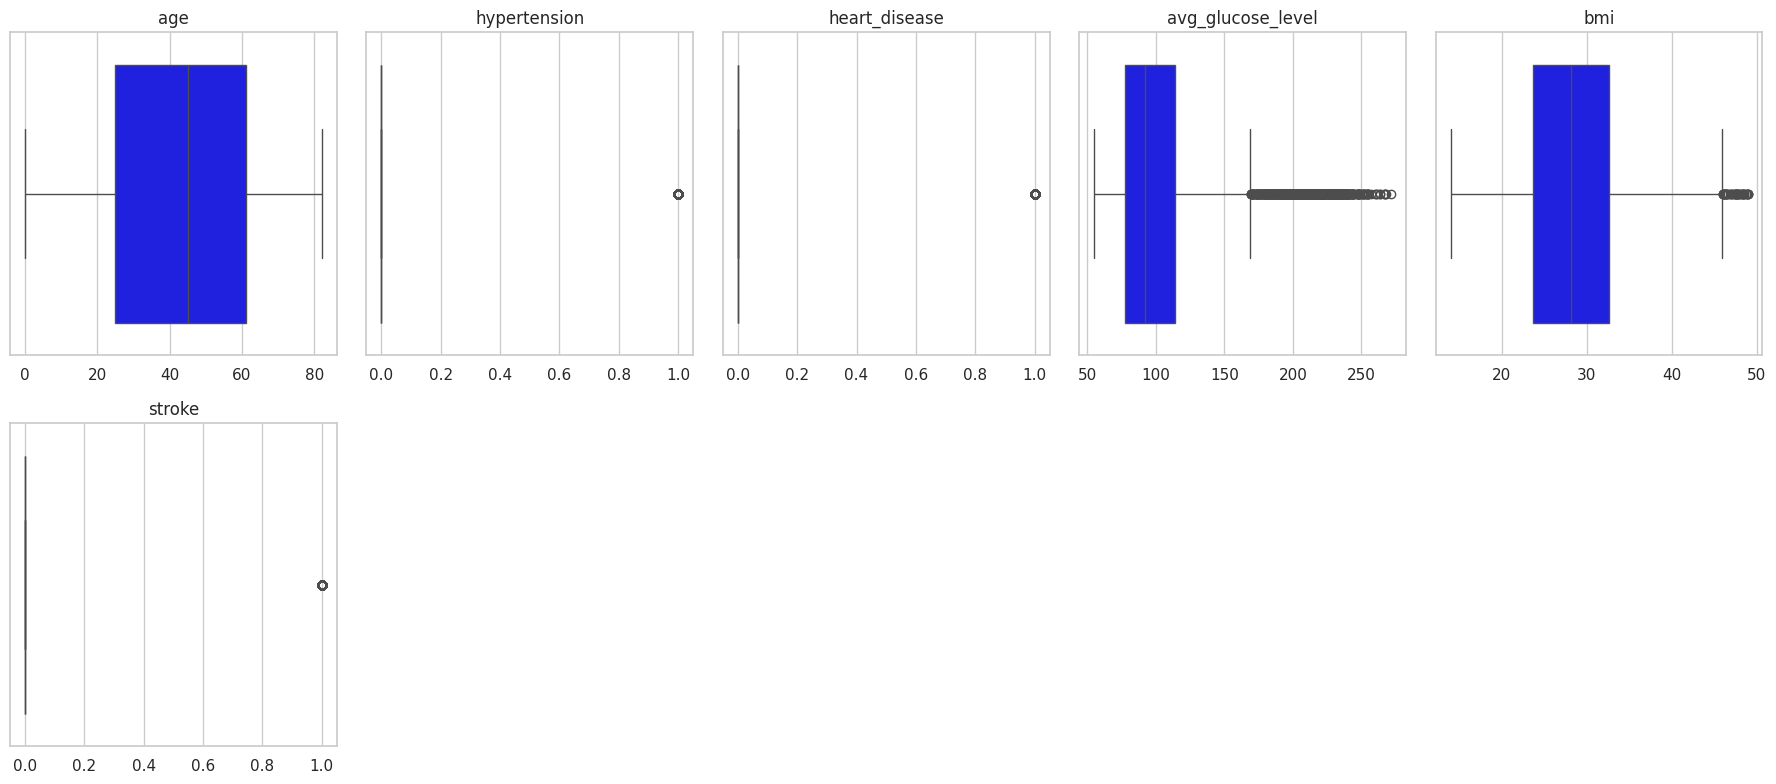

In [ ]:
sns.set(style="whitegrid")

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

num_plots = len(numerical_features)
rows = num_plots // 5 + int(num_plots % 5 != 0)

plt.figure(figsize=(18, rows * 4))

for i, column in enumerate(numerical_features):
    plt.subplot(rows, 5, i + 1)
    sns.boxplot(x=df[column], color='blue')

    plt.title(column, fontsize=12)

    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

##6. Feature Selection
To improve model efficiency and reduce overfitting, feature selection is applied using techniques like Recursive Feature Elimination (RFE) and SelectKBest. The most relevant features are chosen based on statistical significance, ensuring the model only considers informative attributes.

In [ ]:
#Convert categorical columns to numeric if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [ ]:
#Target a single column
target_column='stroke'

In [ ]:
# Data Preprocessing
# Handle missing values
# Splitting dataset into features and target variable
X = df.drop(columns=[target_column])
y = df[target_column]

In [ ]:
# Convert categorical columns to numeric if necessary
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

##7. Data Splitting and Standardization
Explanation:
The dataset is split into training and testing sets to evaluate model performance. Feature scaling is performed using StandardScaler to ensure that numerical variables have a consistent scale, improving the convergence of machine learning algorithms.

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##8. Building a Logistic Regression Model from Scratch
Explanation:
A logistic regression model is implemented manually using mathematical formulations of the sigmoid function. The model is trained using gradient descent, and its performance is evaluated using classification metrics.

In [ ]:
# Build Logistic Regression from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    return (-1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for _ in range(iterations):
        theta -= (alpha/m) * (X.T @ (sigmoid(X @ theta) - y))
    return theta

X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
theta = np.zeros(X_train_bias.shape[1])
optimized_theta = gradient_descent(X_train_bias, y_train, theta, alpha=0.01, iterations=1000)

In [ ]:
# Predict using custom Logistic Regression
def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.3).astype(int)

y_pred_custom = predict(np.c_[np.ones((X_test.shape[0], 1)), X_test], optimized_theta)

unique, counts = np.unique(y_pred_custom, return_counts=True)
print(dict(zip(unique, counts)))

print("Custom Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_custom))
print("Classification Report:\n", classification_report(y_test, y_pred_custom))

{0: 994, 1: 3}
Custom Logistic Regression Performance:
Accuracy: 0.9468405215646941
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       0.67      0.04      0.07        54

    accuracy                           0.95       997
   macro avg       0.81      0.52      0.52       997
weighted avg       0.93      0.95      0.92       997



##9. Model Training and Evaluation
At least two machine learning models (e.g., Logistic Regression and Decision Tree) are trained on the dataset. Model performance is assessed using accuracy, precision, recall, F1-score, and confusion matrix. This step helps determine the effectiveness of different classification algorithms.

In [ ]:
# Train ML Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Add `zero_division=1` to avoid warnings
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Logistic Regression Performance:
Accuracy: 0.9458375125376128
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       943
           1       1.00      0.00      0.00        54

    accuracy                           0.95       997
   macro avg       0.97      0.50      0.49       997
weighted avg       0.95      0.95      0.92       997

Confusion Matrix:
 [[943   0]
 [ 54   0]]

Decision Tree Performance:
Accuracy: 0.9147442326980942
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       943
           1       0.21      0.20      0.21        54

    accuracy                           0.91       997
   macro avg       0.58      0.58      0.58       997
weighted avg       0.91      0.91      0.91       997

Confusion Matrix:
 [[901  42]
 [ 43  11]]

Random Forest Performance:
Accuracy: 0.9418254764292878
Classification Report:
              

#ROC and AUC curve

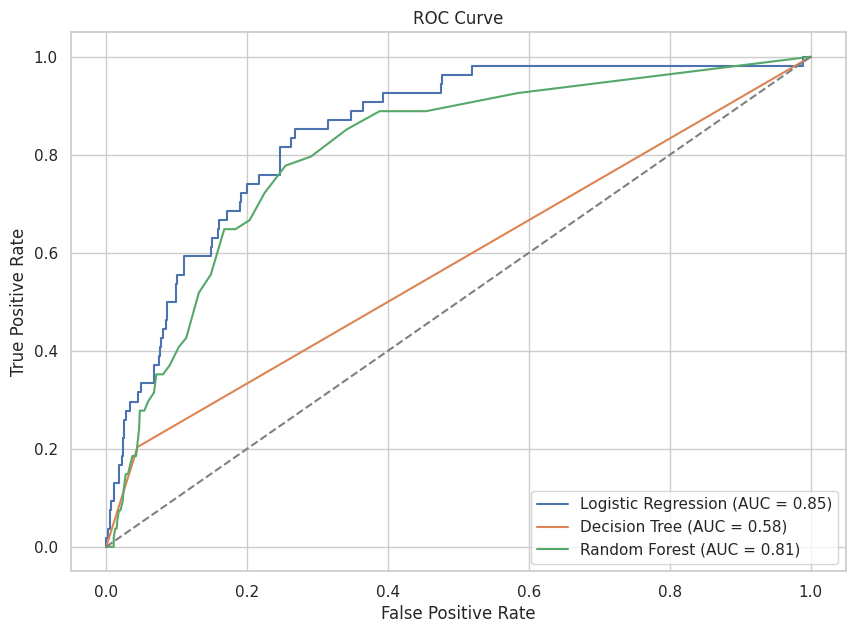

In [ ]:
# Plot ROC Curve for all models
plt.figure(figsize=(10, 7))

for model_name, model in models.items():
    # Get probability predictions
    y_prob = model.predict_proba(X_test)[:, 1]  # Take the probability of class 1
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')

# Plot the random classifier baseline
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


##10. Hyperparameter Optimization
Hyperparameter tuning is performed using GridSearchCV or RandomizedSearchCV to find the best model parameters. This ensures the models achieve optimal performance by adjusting learning rates, regularization strengths, or tree depths.

In [ ]:
# Hyperparameter Optimization using GridSearchCV
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Decision Tree': {'max_depth': [3, 5, 10]},
    'Random Forest': {'n_estimators': [50, 100, 200]}
}

best_models = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grid[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"\nBest parameters for {name}: {grid_search.best_params_}")


Best parameters for Logistic Regression: {'C': 0.1}

Best parameters for Decision Tree: {'max_depth': 3}

Best parameters for Random Forest: {'n_estimators': 100}


In [ ]:
# Feature Selection using Recursive Feature Elimination (RFE)
rfe = RFE(LogisticRegression(), n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = X.columns[rfe.support_]
print("\nSelected Features:", selected_features)


Selected Features: Index(['age', 'hypertension', 'work_type', 'avg_glucose_level',
       'smoking_status'],
      dtype='object')


Selected Features:
Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'avg_glucose_level'],
      dtype='object')


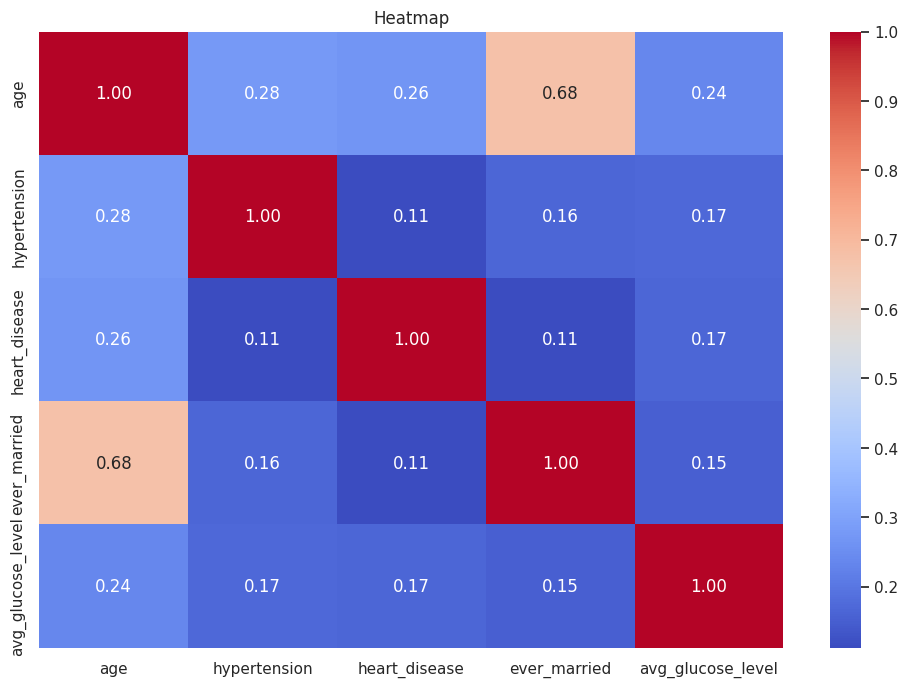

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply SelectKBest feature selection
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_new = selector.fit_transform(X_scaled, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features)

# Create a DataFrame with the selected features
selected_data = pd.DataFrame(X_new, columns=selected_features)

# Plot heatmap for the selected features
plt.figure(figsize=(12, 8))
sns.heatmap(selected_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap')
plt.show()

##11. Final Model Selection and Performance Comparison
The final models, incorporating selected features and optimized hyperparameters, are compared. The best-performing model is identified based on evaluation metrics, and its predictions are analyzed for insights.

In [ ]:
# Final Model Evaluation
for name, model in best_models.items():
    y_pred = model.predict(X_test)

    print(f"\nFinal {name} Model Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Add zero_division=1 to avoid warnings
    print("Precision:", precision_score(y_test, y_pred, average='weighted', zero_division=1))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1-Score:", f1_score(y_test, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Final Logistic Regression Model Performance:
Accuracy: 0.9458375125376128
Precision: 0.9487710875857261
Recall: 0.9458375125376128
F1-Score: 0.9195100766216174
Confusion Matrix:
 [[943   0]
 [ 54   0]]

Final Decision Tree Model Performance:
Accuracy: 0.9458375125376128
Precision: 0.9225374616311245
Recall: 0.9458375125376128
F1-Score: 0.9214172814773378
Confusion Matrix:
 [[942   1]
 [ 53   1]]

Final Random Forest Model Performance:
Accuracy: 0.9438314944834504
Precision: 0.894505627435069
Recall: 0.9438314944834504
F1-Score: 0.9185068104209428
Confusion Matrix:
 [[941   2]
 [ 54   0]]


##12 Conclusion and Future Directions
A summary of findings is presented, discussing model performance, key insights, and the impact of feature selection and hyperparameter tuning. Potential improvements, such as using more advanced models or collecting additional data, are suggested for future work.

In [ ]:
# Conclusion
print("\nConclusion: The best performing model based on accuracy and F1-score is:",
      max(best_models, key=lambda name: accuracy_score(y_test, best_models[name].predict(X_test))))


Conclusion: The best performing model based on accuracy and F1-score is: Logistic Regression
